# Data Collection

## Scraping Reddit Posts

In [1]:
!pip install praw

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 191.0/191.0 kB 3.8 MB/s eta 0:00:00


In [2]:
import praw
import pandas as pd
from textblob import TextBlob
import time

# Reddit API credentials
reddit = praw.Reddit(client_id='DAOso5_7CHzXzdtd-070fg',
                     client_secret='JtdGFRDM10avSQFYthzYUQNfLeI8rQ',
                     user_agent='Mental Health')

# Subreddits related to mental health
subreddits = ['normal', 'depression', 'anxiety', 'bipolar', 'ptsd']

# List to store posts
data = []

# Scrape posts from each subreddit and post type
post_types = ['hot', 'new', 'top']

# Aiming for 20,000 posts total
posts_per_type = 1500  # Approximate posts needed per subreddit and type

for subreddit in subreddits:
    for post_type in post_types:
        if post_type == 'hot':
            subreddit_posts = reddit.subreddit(subreddit).hot(limit=posts_per_type)
        elif post_type == 'new':
            subreddit_posts = reddit.subreddit(subreddit).new(limit=posts_per_type)
        elif post_type == 'top':
            subreddit_posts = reddit.subreddit(subreddit).top(limit=posts_per_type)

        for post in subreddit_posts:
            post_content = post.title + " " + post.selftext  # Combine title and body
            sentiment = TextBlob(post_content).sentiment.polarity  # Get sentiment polarity (-1 to 1)

            # Label the sentiment as positive, neutral, or negative
            if sentiment > 0:
                sentiment_label = 1.0
            elif sentiment < 0:
                sentiment_label = -1.0
            else:
                sentiment_label = 0.0

            # Label the mental health issue based on the subreddit
            issue = subreddit

            data.append([post_content, sentiment_label, issue])

        # Avoid hitting Reddit's rate limit
        time.sleep(2)

# Convert to DataFrame
df = pd.DataFrame(data, columns=['text', 'sentiment', 'mental_health_issue'])

# Save to CSV
df.to_csv('mental_health.csv', index=False)


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/l

## Generate Final Dataset

In [3]:
import pandas as pd

# Load the two CSV files
csv1 = pd.read_csv('mental_health.csv')
csv2 = pd.read_csv('twitter_mh.csv')

# Combine the two dataframes vertically
combined_csv = pd.concat([csv1, csv2], ignore_index=True)

# Save the result to a new CSV file
combined_csv.to_csv('mental_health_text.csv', index=False)

print("CSV files combined successfully!")


CSV files combined successfully!


# Data Preprocessing

In [4]:
import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk

# Download stopwords (if you haven't already)
nltk.download('stopwords')
nltk.download('punkt')

# Load the dataset
df = pd.read_csv('mental_health_text.csv')

# 1. Handling Missing Values
# Remove rows with missing text
df.dropna(subset=['text'], inplace=True)

# 2. Removing duplicates (if any)
df.drop_duplicates(subset=['text'], inplace=True)

# 3. Text Preprocessing

# Define a function to clean the text
def clean_text(text):
    # Remove URLs
    text = re.sub(r'http\S+', '', text)

    # Remove mentions (@username)
    text = re.sub(r'@\w+', '', text)

    # Remove special characters, numbers, and punctuations
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # Convert text to lowercase
    text = text.lower()

    # Tokenize the text
    tokens = word_tokenize(text)

    # Remove stopwords
    tokens = [word for word in tokens if word not in stopwords.words('english')]

    # Join the tokens back into a single string
    clean_text = ' '.join(tokens)

    return clean_text

# Apply the cleaning function to the 'text' column
df['cleaned_text'] = df['text'].apply(clean_text)

# 4. Feature Extraction using TF-IDF Vectorization

# Initialize the TF-IDF vectorizer
vectorizer = TfidfVectorizer(max_features=5000)  # You can adjust the max_features

# Fit and transform the cleaned text data
X = vectorizer.fit_transform(df['cleaned_text'])

# Convert the result to a DataFrame for easier understanding (optional)
X_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

# You now have a cleaned and vectorized dataset.
print(X_df.head())

# Save the preprocessed dataset (optional)
df.to_csv('preprocessed_mental_health_text.csv', index=False)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


    aa  aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa  abandon  abandoned  abandonment  \
0  0.0                                 0.0      0.0        0.0          0.0   
1  0.0                                 0.0      0.0        0.0          0.0   
2  0.0                                 0.0      0.0        0.0          0.0   
3  0.0                                 0.0      0.0        0.0          0.0   
4  0.0                                 0.0      0.0        0.0          0.0   

   abdominal  abilify  ability  able  abnormal  ...  youth  youtube  youve  \
0        0.0      0.0      0.0   0.0   0.22298  ...    0.0      0.0    0.0   
1        0.0      0.0      0.0   0.0   0.00000  ...    0.0      0.0    0.0   
2        0.0      0.0      0.0   0.0   0.00000  ...    0.0      0.0    0.0   
3        0.0      0.0      0.0   0.0   0.00000  ...    0.0      0.0    0.0   
4        0.0      0.0      0.0   0.0   0.00000  ...    0.0      0.0    0.0   

    yr  yrs  zero  zoloft  zombie  zone  zoning  
0  0.0

# Implementation of Bag Of Words

In [6]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Load the preprocessed dataset
dataset = pd.read_csv('preprocessed_mental_health_text.csv')

# Check if 'cleaned_text' column exists
if 'cleaned_text' not in dataset.columns:
    raise ValueError("The dataset must have a 'cleaned_text' column. Ensure text preprocessing has been done.")

# Remove rows with missing values in 'cleaned_text' column
dataset.dropna(subset=['cleaned_text'], inplace=True)

# Initialize the CountVectorizer
vectorizer = CountVectorizer()

# Fit and transform the cleaned text data
X = vectorizer.fit_transform(dataset['cleaned_text'])

# Convert the result to a DataFrame for better visualization (optional)
X_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

# Print the shape of the resulting matrix
print(f'Shape of Bag of Words matrix: {X_df.shape}')

# Print the first few rows of the Bag of Words DataFrame (optional)
print(X_df.head())


Shape of Bag of Words matrix: (8732, 25443)
   aa  aaa  aaaaaaaaa  aaaaaaaaaaaaaaaaaaaaaa  \
0   0    0          0                       0   
1   0    0          0                       0   
2   0    0          0                       0   
3   0    0          0                       0   
4   0    0          0                       0   

   aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa  \
0                                   0   
1                                   0   
2                                   0   
3                                   0   
4                                   0   

   aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaahhhhh  \
0                                        0   
1                                        0   
2                                        0   
3                                        0   
4                                        0   

   aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaahhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhhjjjjjjjjjj  \
0                         

# Splitting Preprocessed Dataset

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the preprocessed dataset
dataset = pd.read_csv('preprocessed_mental_health_text.csv')

# Check if 'cleaned_text' and 'mental_health_issue' columns exist
if 'cleaned_text' not in dataset.columns or 'mental_health_issue' not in dataset.columns:
    raise ValueError("The dataset must have 'cleaned_text' and 'mental_health_issue' columns.")

# Remove rows with missing values in 'cleaned_text' column
dataset.dropna(subset=['cleaned_text'], inplace=True) #This line has been added

# Initialize the CountVectorizer and fit/transform the cleaned text
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(dataset['cleaned_text'])

# Prepare the target variable
y = dataset['mental_health_issue']

# Split the dataset into Training and Test Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the resulting datasets
print(f'Shape of X_train: {X_train.shape}')
print(f'Shape of X_test: {X_test.shape}')
print(f'Shape of y_train: {y_train.shape}')
print(f'Shape of y_test: {y_test.shape}')


Shape of X_train: (6985, 25443)
Shape of X_test: (1747, 25443)
Shape of y_train: (6985,)
Shape of y_test: (1747,)


# Logistic Regression

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Load the preprocessed dataset
dataset = pd.read_csv('preprocessed_mental_health_text.csv')

# Check if 'cleaned_text' and 'mental_health_issue' columns exist
if 'cleaned_text' not in dataset.columns or 'mental_health_issue' not in dataset.columns:
    raise ValueError("The dataset must have 'cleaned_text' and 'mental_health_issue' columns.")

# Remove rows with missing values in 'cleaned_text' column
dataset.dropna(subset=['cleaned_text'], inplace=True)

# Initialize the CountVectorizer and fit/transform the cleaned text
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(dataset['cleaned_text'])

# Prepare the target variable
y = dataset['mental_health_issue']

# Split the dataset into Training and Test Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Logistic Regression model
model = LogisticRegression(max_iter=2000)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 73.78%
Classification Report:
               precision    recall  f1-score   support

     anxiety       0.78      0.73      0.75       416
     bipolar       0.66      0.84      0.74       412
  depression       0.74      0.72      0.73       443
     neutral       0.08      0.06      0.07        17
      normal       0.78      0.22      0.34        32
        ptsd       0.83      0.74      0.78       427

    accuracy                           0.74      1747
   macro avg       0.64      0.55      0.57      1747
weighted avg       0.75      0.74      0.74      1747



## Hyperparameter Tuning using Random Search

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Load the preprocessed dataset
dataset = pd.read_csv('preprocessed_mental_health_text.csv')

# Check if 'cleaned_text' and 'mental_health_issue' columns exist
if 'cleaned_text' not in dataset.columns or 'mental_health_issue' not in dataset.columns:
    raise ValueError("The dataset must have 'cleaned_text' and 'mental_health_issue' columns.")

# Remove rows with missing values in 'cleaned_text' column
dataset.dropna(subset=['cleaned_text'], inplace=True)

# Initialize the CountVectorizer and fit/transform the cleaned text
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(dataset['cleaned_text'])

# Prepare the target variable
y = dataset['mental_health_issue']

# Split the dataset into Training and Test Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Logistic Regression model
model = LogisticRegression(max_iter=200)

# Define the hyperparameter grid for Randomized Search
param_distributions = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],       # Inverse of regularization strength
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],  # Regularization types
    'solver': ['liblinear', 'saga']             # Solvers that support l1, elasticnet
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_distributions,
                                   n_iter=10, scoring='accuracy', cv=5, n_jobs=-1, random_state=42)

# Fit RandomizedSearchCV
random_search.fit(X_train, y_train)

# Best hyperparameters from Random Search
print("Best Hyperparameters:", random_search.best_params_)

# Best model from Random Search
best_model = random_search.best_estimator_

# Make predictions using the best model
y_pred = best_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred))


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
15 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1204, in fit
    raise ValueError("l1_ratio must be specified when penalty is elasticnet."

Best Hyperparameters: {'solver': 'liblinear', 'penalty': 'l1', 'C': 1}
Accuracy: 75.27%
Classification Report:
               precision    recall  f1-score   support

     anxiety       0.80      0.75      0.77       416
     bipolar       0.66      0.85      0.74       412
  depression       0.75      0.74      0.75       443
     neutral       0.14      0.12      0.13        17
      normal       0.78      0.22      0.34        32
        ptsd       0.86      0.75      0.80       427

    accuracy                           0.75      1747
   macro avg       0.67      0.57      0.59      1747
weighted avg       0.76      0.75      0.75      1747



## Graph

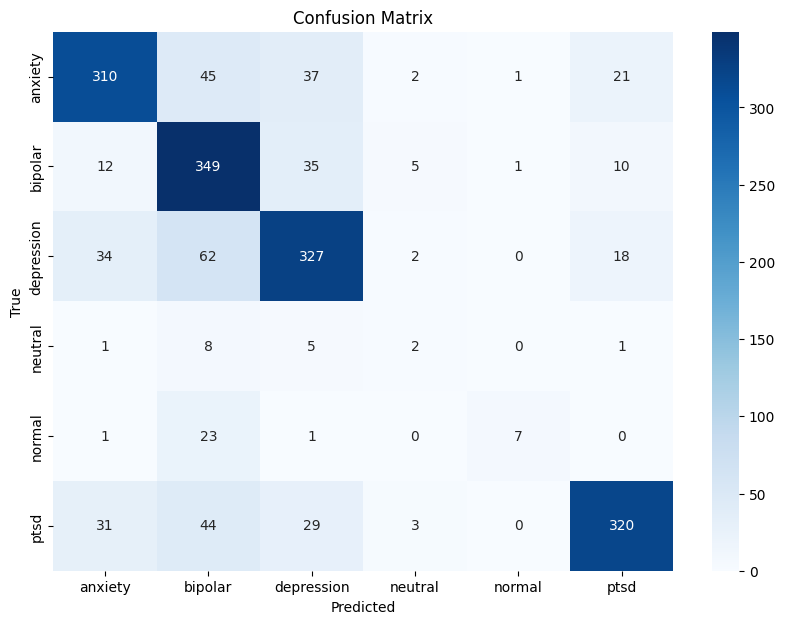

In [14]:
# Confusion Matrix

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=best_model.classes_)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=best_model.classes_, yticklabels=best_model.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


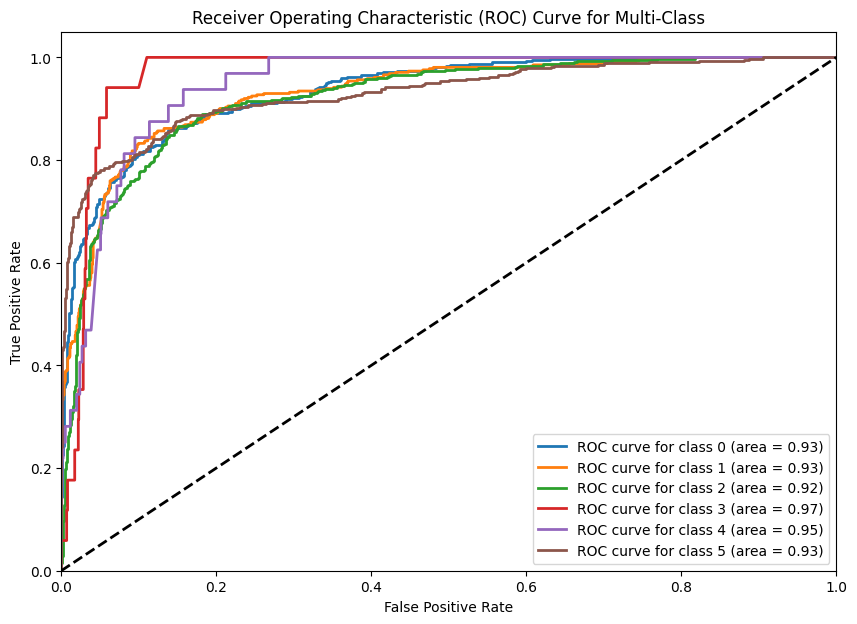

In [19]:
# ROC Curve

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Binarize the output
y_test_binarized = label_binarize(y_test, classes=best_model.classes_)
n_classes = y_test_binarized.shape[1]

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

# Iterate through each class
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], best_model.predict_proba(X_test)[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure(figsize=(10, 7))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label='ROC curve for class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

# Plotting the diagonal line
plt.plot([0, 1], [0, 1], 'k--', lw=2)

# Customize the plot
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Multi-Class')
plt.legend(loc='lower right')
plt.show()


# K Nearest Neighbours

In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the preprocessed dataset
dataset = pd.read_csv('preprocessed_mental_health_text.csv')

# Check if 'cleaned_text' and 'mental_health_issue' columns exist
if 'cleaned_text' not in dataset.columns or 'mental_health_issue' not in dataset.columns:
    raise ValueError("The dataset must have 'cleaned_text' and 'mental_health_issue' columns.")

# Remove rows with missing values in 'cleaned_text' column
dataset.dropna(subset=['cleaned_text'], inplace=True)

# Initialize the CountVectorizer and fit/transform the cleaned text
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(dataset['cleaned_text'])

# Prepare the target variable
y = dataset['mental_health_issue']

# Split the dataset into Training and Test Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the k-NN classifier
knn = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors

# Fit the model
knn.fit(X_train, y_train)

# Make predictions
y_pred = knn.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Print confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 39.61%
Classification Report:
               precision    recall  f1-score   support

     anxiety       0.60      0.36      0.45       416
     bipolar       0.31      0.83      0.45       412
  depression       0.46      0.35      0.40       443
     neutral       0.00      0.00      0.00        17
      normal       0.29      0.06      0.10        32
        ptsd       0.81      0.11      0.20       427

    accuracy                           0.40      1747
   macro avg       0.41      0.28      0.27      1747
weighted avg       0.54      0.40      0.36      1747

Confusion Matrix:
 [[148 221  46   0   0   1]
 [ 24 340  42   1   3   2]
 [ 36 246 154   0   0   7]
 [  2  14   0   0   0   1]
 [  0  30   0   0   2   0]
 [ 38 248  91   0   2  48]]


## Hyperparameter Tuning Using Random Search

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the preprocessed dataset
dataset = pd.read_csv('preprocessed_mental_health_text.csv')

# Check if 'cleaned_text' and 'mental_health_issue' columns exist
if 'cleaned_text' not in dataset.columns or 'mental_health_issue' not in dataset.columns:
    raise ValueError("The dataset must have 'cleaned_text' and 'mental_health_issue' columns.")

# Remove rows with missing values in 'cleaned_text' column
dataset.dropna(subset=['cleaned_text'], inplace=True)

# Initialize the CountVectorizer and fit/transform the cleaned text
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(dataset['cleaned_text'])

# Prepare the target variable
y = dataset['mental_health_issue']

# Split the dataset into Training and Test Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the k-NN classifier
knn = KNeighborsClassifier()

# Define the hyperparameter grid for Randomized Search
param_distributions = {
    'n_neighbors': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15, 14, 15, 16, 17, 18, 19, 20],
     # Different values for number of neighbors
    'metric': ['euclidean', 'manhattan', 'chebyshev', 'minkowski'],  # Different distance metrics
    'weights': ['uniform', 'distance']  # Weighing options for neighbors
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=knn, param_distributions=param_distributions,
                                   n_iter=200, scoring='accuracy', cv=5, n_jobs=-1, random_state=42)

# Fit RandomizedSearchCV
random_search.fit(X_train, y_train)

# Best hyperparameters from Random Search
print("Best Hyperparameters:", random_search.best_params_)

# Best model from Random Search
best_knn = random_search.best_estimator_

# Make predictions using the best model
y_pred = best_knn.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Print confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 152 is smaller than n_iter=200. Running 152 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
190 fits failed out of a total of 760.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
190 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 147

Best Hyperparameters: {'weights': 'distance', 'n_neighbors': 4, 'metric': 'euclidean'}
Accuracy: 41.27%
Classification Report:
               precision    recall  f1-score   support

     anxiety       0.65      0.34      0.45       416
     bipolar       0.32      0.82      0.46       412
  depression       0.47      0.39      0.43       443
     neutral       0.00      0.00      0.00        17
      normal       0.26      0.19      0.22        32
        ptsd       0.73      0.15      0.24       427

    accuracy                           0.41      1747
   macro avg       0.40      0.31      0.30      1747
weighted avg       0.53      0.41      0.39      1747

Confusion Matrix:
 [[143 214  52   0   2   5]
 [ 19 337  45   1   7   3]
 [ 31 223 173   1   1  14]
 [  0  15   1   0   0   1]
 [  0  26   0   0   6   0]
 [ 28 233  97   0   7  62]]


## Graph

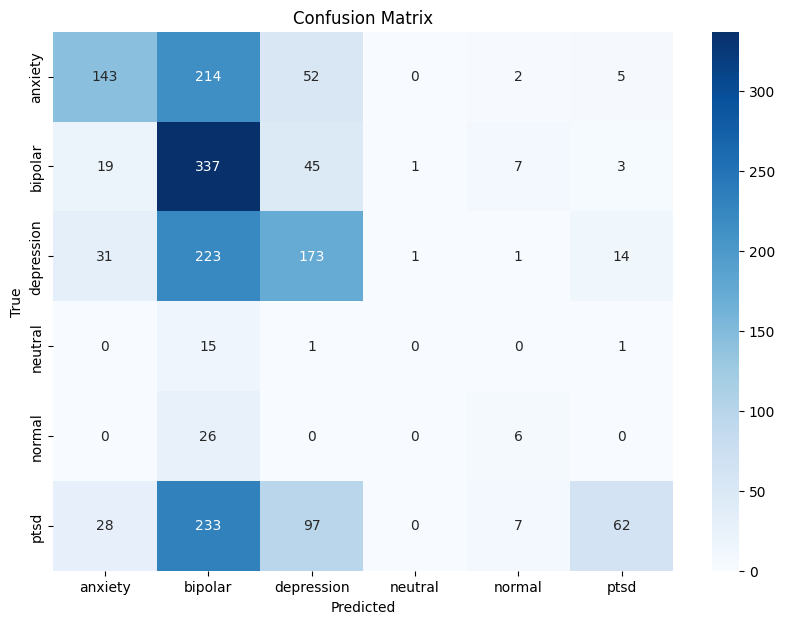

In [23]:
# Confusion Matrix

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=best_knn.classes_)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=best_knn.classes_, yticklabels=best_knn.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


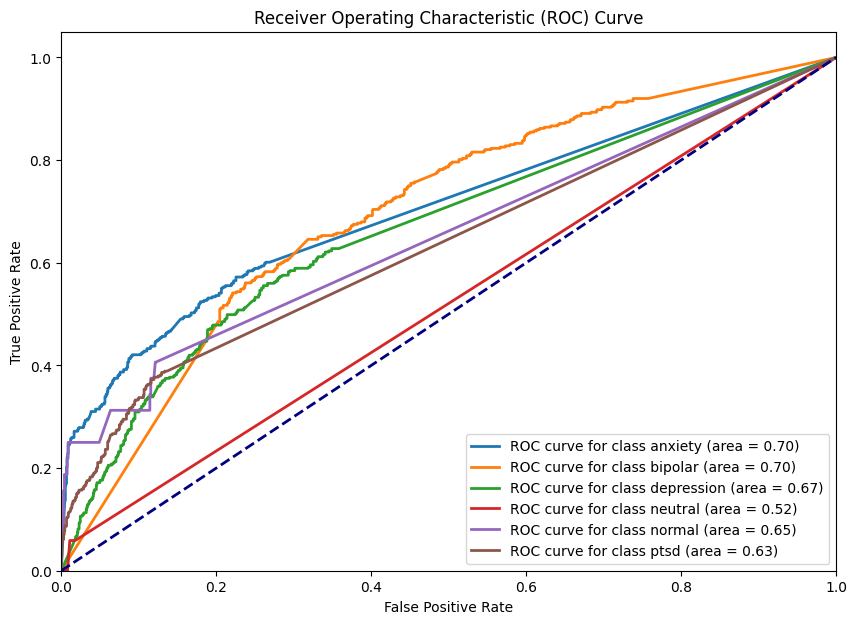

In [24]:
# ROC Curve

from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Binarize the output
y_test_binarized = label_binarize(y_test, classes=best_knn.classes_)
n_classes = y_test_binarized.shape[1]

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], best_knn.predict_proba(X_test)[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure(figsize=(10, 7))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label='ROC curve for class {0} (area = {1:0.2f})'
             ''.format(best_knn.classes_[i], roc_auc[i]))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


# Support Vector Machine

In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the preprocessed dataset
dataset = pd.read_csv('preprocessed_mental_health_text.csv')

# Check if 'cleaned_text' and 'mental_health_issue' columns exist
if 'cleaned_text' not in dataset.columns or 'mental_health_issue' not in dataset.columns:
    raise ValueError("The dataset must have 'cleaned_text' and 'mental_health_issue' columns.")

# Remove rows with missing values in 'cleaned_text' column
dataset.dropna(subset=['cleaned_text'], inplace=True)

# Initialize the CountVectorizer and fit/transform the cleaned text
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(dataset['cleaned_text'])

# Prepare the target variable
y = dataset['mental_health_issue']

# Split the dataset into Training and Test Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Support Vector Classifier
svm_model = SVC(kernel='linear', C=1, random_state=42)  # You can adjust parameters as needed

# Train the model
svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Print confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 70.75%
Classification Report:
               precision    recall  f1-score   support

     anxiety       0.70      0.70      0.70       416
     bipolar       0.65      0.81      0.72       412
  depression       0.72      0.67      0.69       443
     neutral       0.19      0.18      0.18        17
      normal       0.62      0.25      0.36        32
        ptsd       0.81      0.71      0.76       427

    accuracy                           0.71      1747
   macro avg       0.61      0.55      0.57      1747
weighted avg       0.71      0.71      0.71      1747

Confusion Matrix:
 [[292  45  44   2   1  32]
 [ 23 333  37   5   3  11]
 [ 59  58 296   2   0  28]
 [  1   7   5   3   0   1]
 [  0  24   0   0   8   0]
 [ 41  47  30   4   1 304]]


## Hyperparameter Tuning using Random Search

In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Load the preprocessed dataset
dataset = pd.read_csv('preprocessed_mental_health_text.csv')

# Check if 'cleaned_text' and 'mental_health_issue' columns exist
if 'cleaned_text' not in dataset.columns or 'mental_health_issue' not in dataset.columns:
    raise ValueError("The dataset must have 'cleaned_text' and 'mental_health_issue' columns.")

# Remove rows with missing values in 'cleaned_text' column
dataset.dropna(subset=['cleaned_text'], inplace=True)

# Initialize the CountVectorizer and fit/transform the cleaned text
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(dataset['cleaned_text'])

# Prepare the target variable
y = dataset['mental_health_issue']

# Split the dataset into Training and Test Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the SVC model
model = SVC()

# Define the hyperparameter grid for Randomized Search
param_distributions = {
    'C': [0.1, 1, 10, 100],               # Regularization parameter
    'kernel': ['linear', 'rbf', 'poly'],  # Kernel types
    'gamma': ['scale', 'auto', 0.1, 1],   # Kernel coefficient for 'rbf', 'poly', and 'sigmoid'
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_distributions,
                                   n_iter=200, scoring='accuracy', cv=5, n_jobs=-1, random_state=42)

# Fit RandomizedSearchCV
random_search.fit(X_train, y_train)

# Best hyperparameters from Random Search
print("Best Hyperparameters:", random_search.best_params_)

# Best model from Random Search
best_model = random_search.best_estimator_

# Make predictions using the best model
y_pred = best_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred))


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 48 is smaller than n_iter=200. Running 48 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best Hyperparameters: {'kernel': 'linear', 'gamma': 'scale', 'C': 0.1}
Accuracy: 72.07%
Classification Report:
               precision    recall  f1-score   support

     anxiety       0.78      0.71      0.74       416
     bipolar       0.61      0.83      0.70       412
  depression       0.75      0.70      0.72       443
     neutral       0.13      0.12      0.12        17
      normal       0.57      0.12      0.21        32
        ptsd       0.84      0.71      0.77       427

    accuracy                           0.72      1747
   macro avg       0.61      0.53      0.54      1747
weighted avg       0.73      0.72      0.72      1747



## Graph

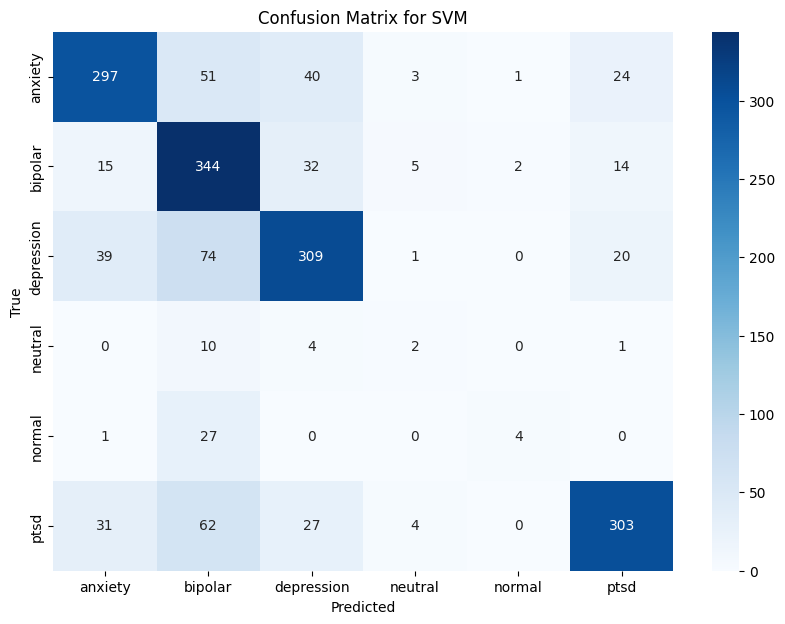

In [35]:
# Confusion Matrix

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=best_model.classes_, yticklabels=best_model.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for SVM')
plt.show()


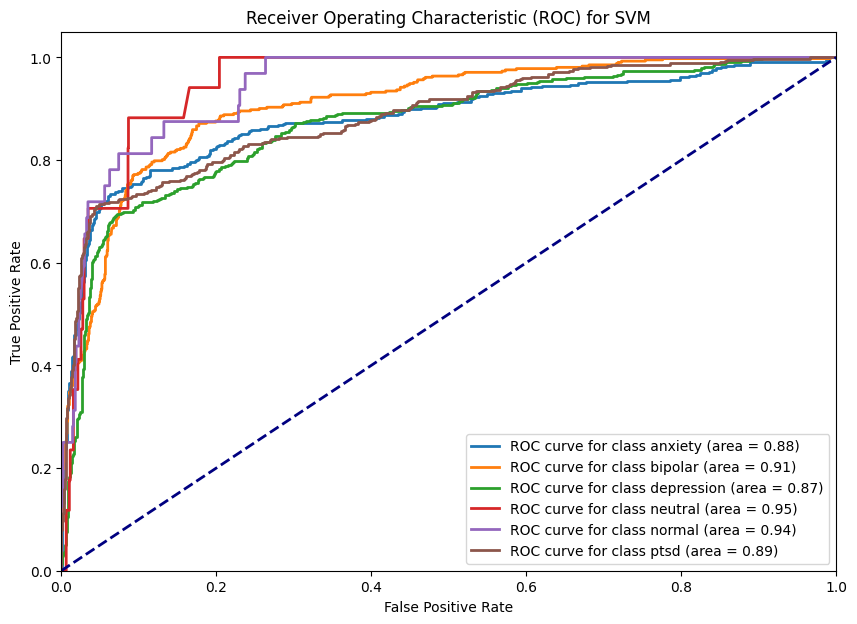

In [36]:
# ROC Curve

from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Binarize the output
y_test_binarized = label_binarize(y_test, classes=best_model.classes_)
n_classes = y_test_binarized.shape[1]

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], best_model.decision_function(X_test)[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure(figsize=(10, 7))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label='ROC curve for class {} (area = {:.2f})'.format(best_model.classes_[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) for SVM')
plt.legend(loc="lower right")
plt.show()


# Naive Bayes

In [39]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the preprocessed dataset
dataset = pd.read_csv('preprocessed_mental_health_text.csv')

# Check if 'cleaned_text' and 'mental_health_issue' columns exist
if 'cleaned_text' not in dataset.columns or 'mental_health_issue' not in dataset.columns:
    raise ValueError("The dataset must have 'cleaned_text' and 'mental_health_issue' columns.")

# Remove rows with missing values in 'cleaned_text' column
dataset.dropna(subset=['cleaned_text'], inplace=True)

# Initialize the CountVectorizer and fit/transform the cleaned text
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(dataset['cleaned_text'])

# Prepare the target variable
y = dataset['mental_health_issue']

# Split the dataset into Training and Test Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Naive Bayes classifier
naive_bayes_model = MultinomialNB()

# Fit the model
naive_bayes_model.fit(X_train, y_train)

# Make predictions
y_pred = naive_bayes_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Print confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 68.92%
Classification Report:
               precision    recall  f1-score   support

     anxiety       0.69      0.72      0.70       416
     bipolar       0.79      0.56      0.65       412
  depression       0.65      0.82      0.72       443
     neutral       0.17      0.29      0.21        17
      normal       0.14      0.03      0.05        32
        ptsd       0.73      0.72      0.72       427

    accuracy                           0.69      1747
   macro avg       0.53      0.52      0.51      1747
weighted avg       0.70      0.69      0.68      1747

Confusion Matrix:
 [[300  14  61   8   3  30]
 [ 51 229  78   5   0  49]
 [ 27  20 362   5   1  28]
 [  1   6   4   5   1   0]
 [ 12   2   9   1   1   7]
 [ 46  20  47   6   1 307]]


## Hyperparameter Tuning using Random Search

In [44]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from scipy.stats import uniform

# Load the preprocessed dataset
dataset = pd.read_csv('preprocessed_mental_health_text.csv')

# Check if 'cleaned_text' and 'mental_health_issue' columns exist
if 'cleaned_text' not in dataset.columns or 'mental_health_issue' not in dataset.columns:
    raise ValueError("The dataset must have 'cleaned_text' and 'mental_health_issue' columns.")

# Remove rows with missing values in 'cleaned_text' column
dataset.dropna(subset=['cleaned_text'], inplace=True)

# Initialize the CountVectorizer and fit/transform the cleaned text
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(dataset['cleaned_text'])

# Prepare the target variable
y = dataset['mental_health_issue']

# Split the dataset into Training and Test Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Naive Bayes model
naive_bayes_model = MultinomialNB()

# Define the parameter distribution for Randomized Search
param_distributions = {
    'alpha': uniform(0.001, 5.0)  # Sampling alpha from a uniform distribution
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=naive_bayes_model, param_distributions=param_distributions,
                                   n_iter=2000, scoring='accuracy', cv=5, n_jobs=-1, random_state=42)

# Fit RandomizedSearchCV
random_search.fit(X_train, y_train)

# Best hyperparameters from Random Search
print("Best Hyperparameters:", random_search.best_params_)

# Best model from Random Search
best_model = random_search.best_estimator_

# Make predictions using the best model
y_pred = best_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Print confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Best Hyperparameters: {'alpha': 0.4524488502720415}
Accuracy: 69.15%
Classification Report:
               precision    recall  f1-score   support

     anxiety       0.68      0.73      0.71       416
     bipolar       0.75      0.61      0.68       412
  depression       0.66      0.79      0.72       443
     neutral       0.18      0.41      0.25        17
      normal       0.14      0.03      0.05        32
        ptsd       0.75      0.68      0.72       427

    accuracy                           0.69      1747
   macro avg       0.53      0.54      0.52      1747
weighted avg       0.70      0.69      0.69      1747

Confusion Matrix:
 [[304  17  56   9   3  27]
 [ 50 252  65   8   0  37]
 [ 31  26 352   8   1  25]
 [  1   6   2   7   1   0]
 [ 12   3   8   1   1   7]
 [ 48  30  50   6   1 292]]


In [60]:
# CHanges

import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Load the preprocessed dataset
dataset = pd.read_csv('preprocessed_mental_health_text.csv')

# Check if 'cleaned_text' and 'mental_health_issue' columns exist
if 'cleaned_text' not in dataset.columns or 'mental_health_issue' not in dataset.columns:
    raise ValueError("The dataset must have 'cleaned_text' and 'mental_health_issue' columns.")

# Remove rows with missing values in 'cleaned_text' column
dataset.dropna(subset=['cleaned_text'], inplace=True)

# Initialize the CountVectorizer and fit/transform the cleaned text
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(dataset['cleaned_text'])

# Prepare the target variable
y = dataset['mental_health_issue']

# Split the dataset into Training and Test Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.14, random_state=42)

# Initialize the Naive Bayes model
model = MultinomialNB()

# Define the hyperparameter grid for Randomized Search
param_distributions = {
    'alpha': [0.1, 0.2, 0.3, 0.5, 0.55, 0.6],
     # Smoothing parameter
    'fit_prior': [True, True],               # Whether to learn class prior probabilities
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_distributions,
                                   n_iter=2000, scoring='accuracy', cv=5, n_jobs=-1, random_state=42)

# Fit RandomizedSearchCV
random_search.fit(X_train, y_train)

# Best hyperparameters from Random Search
print("Best Hyperparameters:", random_search.best_params_)

# Best model from Random Search
best_model = random_search.best_estimator_

# Make predictions using the best model
y_pred = best_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred))


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 12 is smaller than n_iter=2000. Running 12 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best Hyperparameters: {'fit_prior': True, 'alpha': 0.5}
Accuracy: 70.16%
Classification Report:
               precision    recall  f1-score   support

     anxiety       0.68      0.74      0.71       277
     bipolar       0.77      0.63      0.69       289
  depression       0.69      0.81      0.74       316
     neutral       0.20      0.43      0.27        14
      normal       0.17      0.04      0.07        23
        ptsd       0.75      0.69      0.72       304

    accuracy                           0.70      1223
   macro avg       0.54      0.56      0.53      1223
weighted avg       0.71      0.70      0.70      1223



## Graph

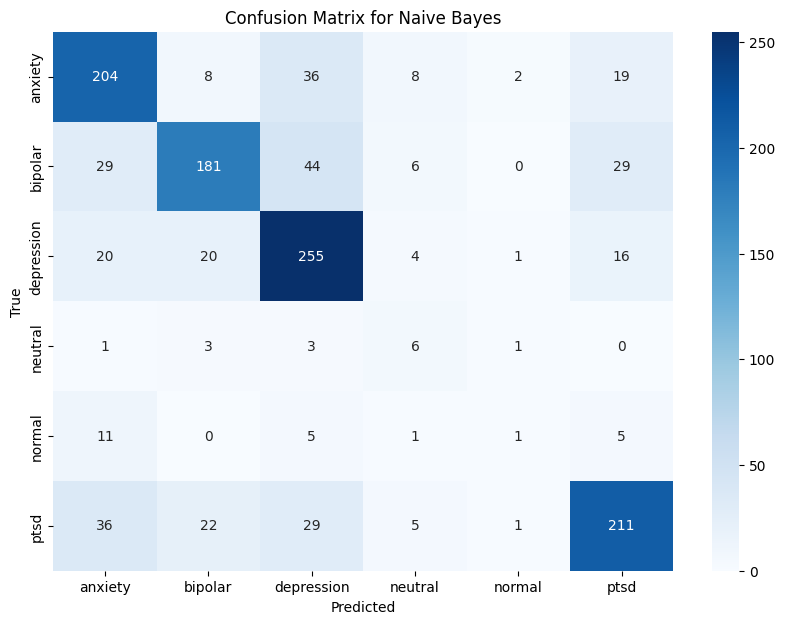

In [61]:
# Confusion Matrix

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=best_model.classes_)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=best_model.classes_, yticklabels=best_model.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Naive Bayes')
plt.show()


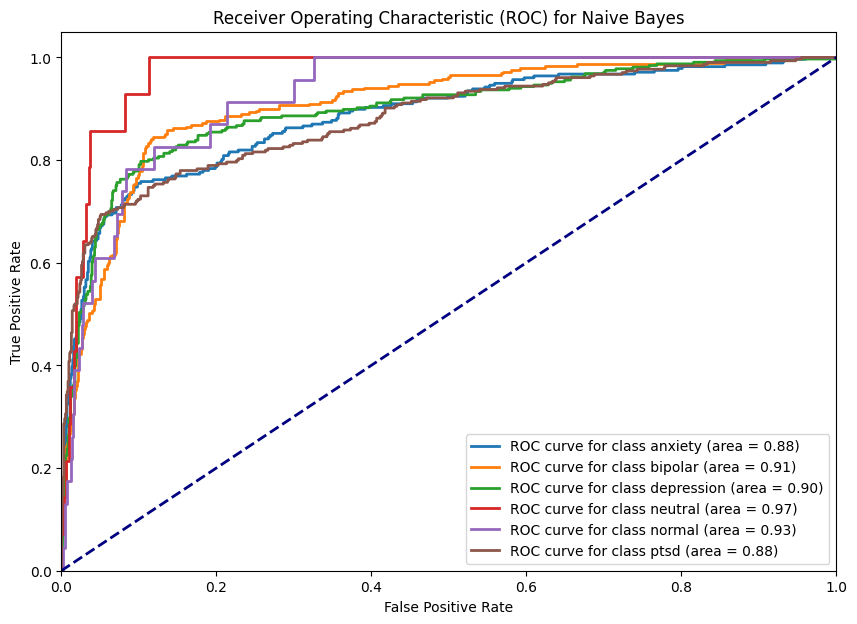

In [62]:
# ROC Curve

from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Binarize the output for ROC
y_test_binarized = label_binarize(y_test, classes=best_model.classes_)
n_classes = y_test_binarized.shape[1]

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

# Calculate ROC curve for each class
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], best_model.predict_proba(X_test)[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure(figsize=(10, 7))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label='ROC curve for class {0} (area = {1:0.2f})'.format(best_model.classes_[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) for Naive Bayes')
plt.legend(loc="lower right")
plt.show()


# Random Forest

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the preprocessed dataset
dataset = pd.read_csv('preprocessed_mental_health_text.csv')

# Check if 'cleaned_text' and 'mental_health_issue' columns exist
if 'cleaned_text' not in dataset.columns or 'mental_health_issue' not in dataset.columns:
    raise ValueError("The dataset must have 'cleaned_text' and 'mental_health_issue' columns.")

# Remove rows with missing values in 'cleaned_text' column
dataset.dropna(subset=['cleaned_text'], inplace=True)

# Initialize the CountVectorizer and fit/transform the cleaned text
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(dataset['cleaned_text'])

# Prepare the target variable
y = dataset['mental_health_issue']

# Split the dataset into Training and Test Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier with added parameters
rf_model = RandomForestClassifier(
    n_estimators=3000,         # Number of trees
    max_depth=None,            # Maximum depth of each tree
    min_samples_split=20,      # Minimum number of samples to split a node

    min_samples_leaf=1,        # Minimum number of samples in a leaf node
    max_features='sqrt',       # Number of features to consider at each split
    bootstrap=False,            # Whether to use bootstrapping

    random_state=42            # For reproducibility
)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Print confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 74.87%
Classification Report:
               precision    recall  f1-score   support

     anxiety       0.76      0.77      0.76       416
     bipolar       0.70      0.77      0.74       412
  depression       0.69      0.80      0.74       443
     neutral       0.20      0.06      0.09        17
      normal       0.83      0.16      0.26        32
        ptsd       0.88      0.73      0.80       427

    accuracy                           0.75      1747
   macro avg       0.68      0.55      0.57      1747
weighted avg       0.75      0.75      0.74      1747

Confusion Matrix:
 [[319  38  50   0   0   9]
 [ 23 319  53   2   1  14]
 [ 31  41 353   0   0  18]
 [  1   9   5   1   0   1]
 [  3  24   0   0   5   0]
 [ 43  22  49   2   0 311]]


## Graph

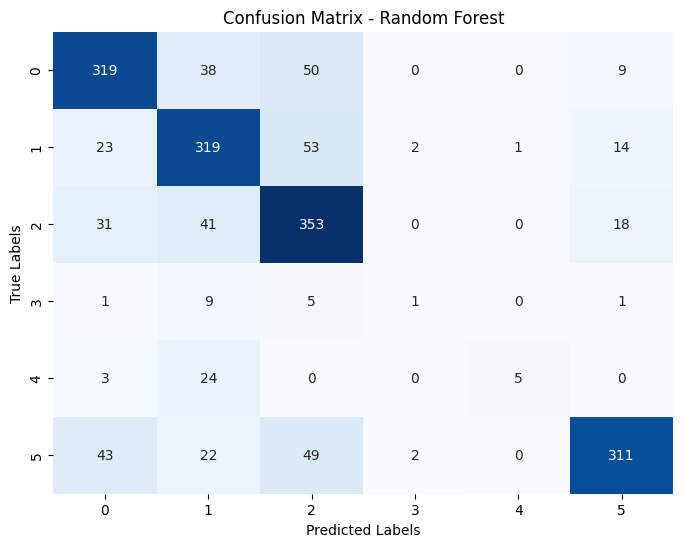

In [8]:
# Confusion Matrix

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using Seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


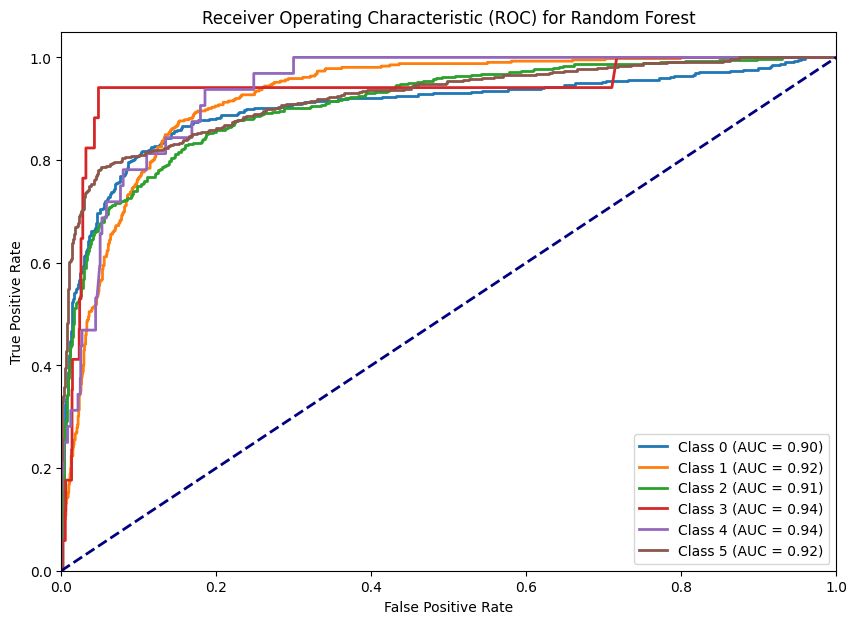

In [9]:
# ROC Curve

from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score

# Binarize the output labels
y_test_binarized = label_binarize(y_test, classes=rf_model.classes_)
n_classes = y_test_binarized.shape[1]

# Get predicted probabilities for each class
y_score = rf_model.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure(figsize=(10, 7))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label='Class {0} (AUC = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) for Random Forest')
plt.legend(loc="lower right")
plt.show()
